In [97]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import torch.nn as nn
import torch.optim as optim

In [98]:
x =np.linspace(start=-2,stop=2,num=200).reshape(-1,1)

In [99]:
x.shape

(200, 1)

In [100]:
# 准备训练数据和测试数据
x_data = np.linspace(start=-2,stop=2,num=200).reshape(-1,1)
noisy = np.random.randn(200, 1) * 0.01
y_data= x_data**2 + noisy

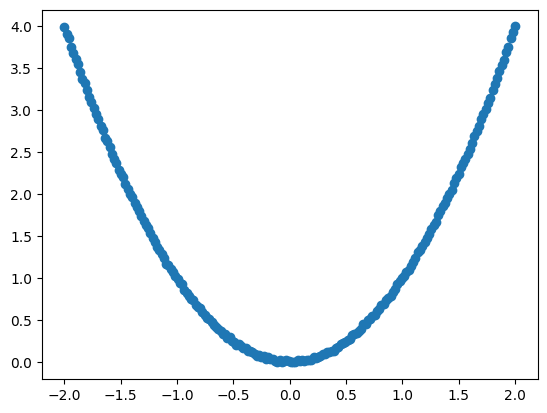

In [101]:
# 查看训练数据的形状
plt.scatter(x_data,y_data)

In [102]:
# 定义线性回归模型
class NonLinearRegression(nn.Module):
    def __init__(self):
        super(NonLinearRegression, self).__init__()
        self.fc1 = nn.Linear(1,20)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(20,1)
    
    def forward(self, x):
        h1 = self.fc1(x)
        a1 = self.tanh(h1)
        y_pred = self.fc2(a1)
        return y_pred

In [103]:
# 将训练数据转换成torch的张量
x = torch.tensor(x_data,dtype=torch.float32)
y = torch.tensor(y_data,dtype=torch.float32)

In [104]:
# 实例化模型
model = NonLinearRegression()

In [105]:
# 查看模型结构
for name,param in model.named_parameters():
    print(name,param.shape)

fc1.weight torch.Size([20, 1])
fc1.bias torch.Size([20])
fc2.weight torch.Size([1, 20])
fc2.bias torch.Size([1])


In [106]:
# 定义模型的优化器和损失函数
optimizer = optim.SGD(model.parameters(),lr = 0.01)
criterion = nn.MSELoss()

In [115]:
# 梯度下降迭代训练模型
for i in range(1000):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if i % 100 == 0:
        print(loss.item())

0.012511017732322216
0.011888130567967892
0.011308597400784492
0.010768392123281956
0.010263950563967228
0.009792153723537922
0.009350216016173363
0.008935665711760521
0.008546296507120132
0.008180135861039162


In [116]:
# 得到训练完成的模型的预测结果
y_pred = model(x)

In [117]:
# 将数据转换成numpy的array
y_pred_arr = y_pred.data.numpy()

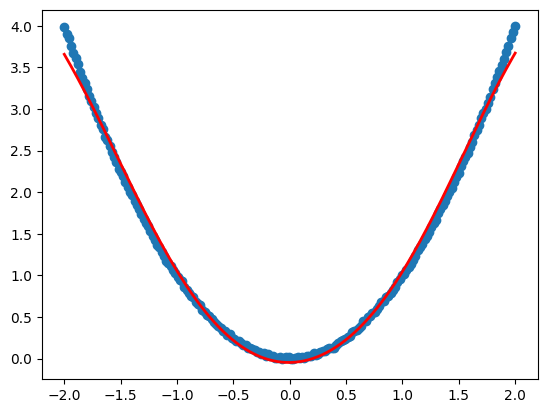

In [118]:
# 对比显示线性回归的预测值和真实值
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred_arr,color='red',linewidth=2)
plt.show()